In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.integrate import simpson, trapezoid, quad, fixed_quad
from scipy.integrate import dblquad

# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Dana Ines Romero Bustos
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [21]:
# Datos
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo (s)
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente (A)

L = 0.98 # H
R = 0.142 # Ohms

# Inciso 1
df_P1 = {'Tiempo (s)': t, 'Corriente (A)': i}
df_P1 = pd.DataFrame(df_P1)
df_P1

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [22]:
# Inciso 2
# Diferencias finitas

def finita(f, xList, h):
  '''
  Derivada de una funcion, usando el metodo de diferencias finitas

  Entradas:

  - f: funcion a derivar
  - xList: Lista de abscisas
  - h: incremento

  Salida:

  - df: arrray con los puntos en y de la derivada en x
  '''

  adelante = lambda f , x , h: (f(x + h) - f(x)) / h
  centrada = lambda f , x , h: (f(x + h) - f(x - h)) / (2 * h)
  atras = lambda f,x,h: (f(x) - f(x - h)) / h

  n = len(xList)
  df = np.zeros(n)

  for i in range(n):

    x = xList[i]

    if i == 0:
      df[i] = (adelante(f, x, h))
    elif i == n-1:
      df[i] = (atras(f, x, h))
    else:
      df[i] = (centrada(f, x, h))

  return(df)


# Tres puntos
def finita_3(f, xList, h):
  '''
  Calcula la derivada de una funcion usando el metodo de 3 puntos

  Entradas:

  - f: funcion a derivar
  - xList: Lista de abscisas
  - h: incremento

  Salida:

  - df: arrray con los puntos en y de la derivada en x
    '''

  adelante = lambda f,x,h: (-3*f(x) +4*f(x+h) -f(x+ 2*h))/(2*h) # Diferencia adelantada
  centrada = lambda f,x,h: (f(x+h) - f(x-h))/(2*h) # diferencia centrada
  atras = lambda f,x,h: (3*f(x) -4*f(x-h) +f(x- 2*h))/(2*h) # Diferencia atrasada

  n = len(xList)
  df = np.zeros(n)

  for i in range(n):

    x = xList[i]

    if i == 0:
      df[i] = (adelante(f, x, h))
    elif i == n-1:
      df[i] = (atras(f, x, h))
    else:
      df[i] = (centrada(f, x, h))

  return(df)

In [23]:
# Interpolacion de la corriente que depende del tiempo
i_interp = CubicSpline(t , i , bc_type= 'natural')

# Derivada usando diferencias finitas
h = (max(t) - min(t))/(len(t) - 1)
di_finita = finita(i_interp, t, h)

# 3 puntos
di_3Puntos = finita_3(i_interp, t, h)

t_vals = np.arange(min(t) ,  max(t) , 0.001)
i_vals = i_interp(t_vals)

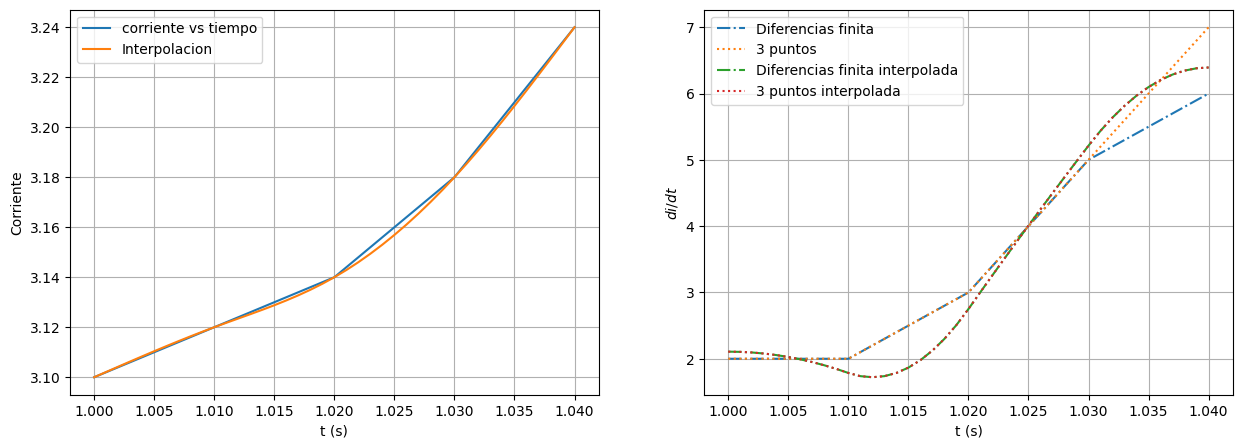

In [30]:
# Inciso 3

h1 = 0.0001
di_finita_Exacta = finita(i_interp, t_vals, h1) # Diferencias finitas exactas
di_3Puntos_Exacta = finita_3(i_interp, t_vals, h1) # 3 puntos exactas

# Graficas

fig , ax = plt.subplots(1 , 2 , figsize = (15 , 5))

# Funcion de la corriente, la cual depende del tiempo
ax[0].plot(t, i, label= 'corriente vs tiempo')
ax[0].plot(t_vals, i_vals, label= 'Interpolacion')

ax[0].set_xlabel('t (s)')
ax[0].set_ylabel('Corriente')
ax[0 i6op[pr]].grid(True)
ax[0].legend()

# Derivadas di/dt
ax[1].plot(t, di_finita, '-.', label= 'Diferencias finita')
ax[1].plot(t, di_3Puntos, ':', label= '3 puntos')

ax[1].plot(t_vals, di_finita_Exacta, '-.', label= 'Diferencias finita interpolada')
ax[1].plot(t_vals, di_3Puntos_Exacta, ':', label= '3 puntos interpolada')

ax[1].set_xlabel('t (s)')
ax[1].set_ylabel('$di/dt$')
ax[1].grid(True)
ax[1].legend()

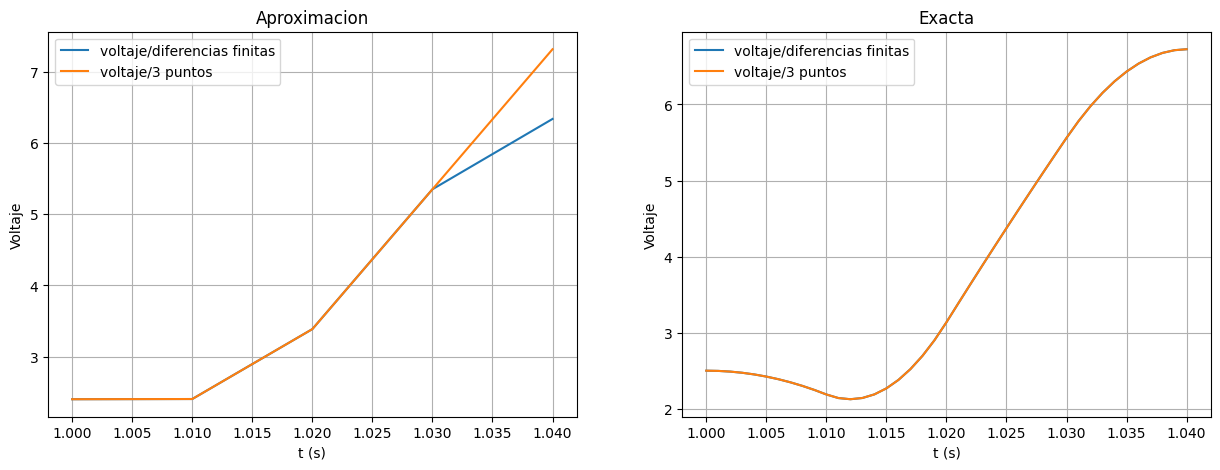

In [29]:
# Aproximación del Voltaje

L = 0.98 # H
R = 0.142 # Ohms
V = lambda di, i: L*di + R*i

# Apriximación con diferencias finitas
V_finita = V(di_finita , i)

# Aproximación usando 3 puntos
V_3Puntos = V(di_3Puntos , i)

# Apriximsciones exactas:

# Diferencias finitas
V_finita_Exacta = V(di_finita_Exacta , i_vals)

# 3 puntos
V_3Puntos_Exacta = V(di_3Puntos_Exacta , i_vals)

# Graficas

fig , ax = plt.subplots(1 , 2 , figsize= (15, 5))

ax[0].plot(t, V_finita, label= 'voltaje/diferencias finitas')
ax[0].plot(t, V_3Puntos, label= 'voltaje/3 puntos')

ax[0].set_title('Aproximacion')
ax[0].set_xlabel('t (s)')
ax[0].set_ylabel('Voltaje')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_vals, V_finita_Exacta, label= 'voltaje/diferencias finitas')
ax[1].plot(t_vals, V_3Puntos_Exacta, label= 'voltaje/3 puntos')

ax[1].set_title('Exacta')
ax[1].set_xlabel('t (s)')
ax[1].set_ylabel('Voltaje')
ax[1].grid(True)
ax[1].legend()

# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




Velocidad instantanea para t = 12: v = [89.67297946]


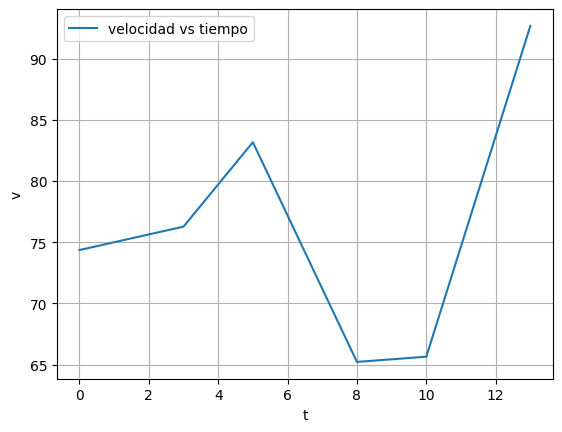

In [53]:
# Datos
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x_posicion = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m

# Interpolacion
x_interp = CubicSpline(t, x_posicion, bc_type= 'natural')

# Inciso 1
# Grafica de velocidad vs tiempo
plt.plot(t, v, label= 'velocidad vs tiempo')
plt.xlabel('t')
plt.ylabel('v')
plt.grid(True)
plt.legend()

# Inciso 2
h = 0.0001
v = finita(x_interp, t, h)
v_12 = finita(x_interp, [12], h)

print(f'Velocidad instantanea para t = 12: v = {v_12}')

# 3.
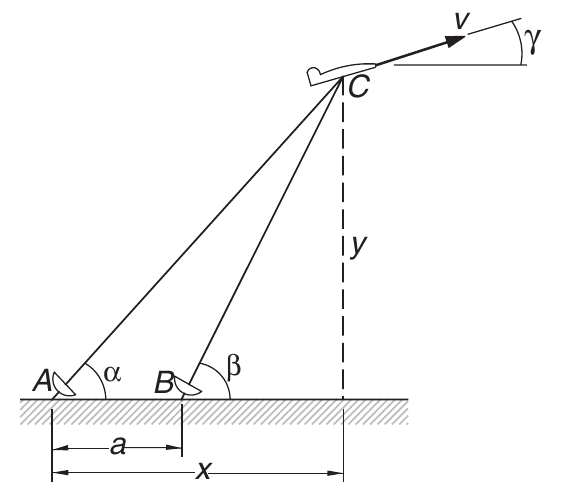


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [55]:
# Datos
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

# Calculos de las coordenadas X y Y en base a los angulos dados
a = 500 # m

# Convertimos los grados a radianes con np.radians()
x = a * (np.tan(np.radians(data['beta (°)']))) / (np.tan(np.radians(data['beta (°)'])) - np.tan(np.radians(data['alpha (°)'])))
y = a * (np.tan(np.radians(data['alpha (°)'])) * np.tan(np.radians(data['beta (°)']))) / (np.tan(np.radians(data['beta (°)'])) - np.tan(np.radians(data['alpha (°)'])))

data['x (m)'] = x
data['y (m)'] = y

df = pd.DataFrame(data)
df

,t (s),alpha (°),beta (°),x (m),y (m)
0,9,54.80,65.59,1401.918398,1987.346016
1,10,54.06,64.59,1450.497006,2000.840713
2,11,53.34,63.62,1498.640350,2013.512411


In [56]:
# Derivada de la posicion respecto a t

Vx, Vy = np.gradient(df['x (m)'], df['t (s)'], edge_order= 2) , np.gradient(df['y (m)'], df['t (s)'], edge_order= 2)
velocidad = np.linalg.norm(np.array([Vx, Vy]), axis= 0) # Magnitudes de las velocidades
gamma = np.arctan(Vy/Vx) # Angulos gamma

df['v (m/s)'] = velocidad
df['\u03B3 (°)'] = np.degrees(gamma)

display(df)
print(f"La velocidad en t = 10 es: {df.loc[df['t (s)'] == 10, 'v (m/s)'].values[0]} m/s ")

,t (s),alpha (°),beta (°),x (m),y (m),v (m/s),γ (°)
0,9,54.80,65.59,1401.918398,1987.346016,50.739091,15.906757
1,10,54.06,64.59,1450.497006,2000.840713,50.099442,15.137988
2,11,53.34,63.62,1498.640350,2013.512411,49.469044,14.349481


La velocidad en t = 10 es: 50.09944162965305 m/s 


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [57]:
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# Interpolacion para los datos de la velocidad
V_t = CubicSpline(t, v, bc_type='natural')

# Integramos la velocidad respecto al tiempo con el metodo quad para encontrar la posicion
a , b = 0 , 28
x = quad(V_t, a, b)[0]
aceleracion = np.gradient(v, t, edge_order= 2)[np.where(t == 28)[0]][0]

print(f'Distancia recorrida para desde t = 0 s, hasta t = 28 s: {x}\n')
print(f'Aceleracion en t = 28 s: {aceleracion}')

Distancia recorrida para desde t = 0 s, hasta t = 28 s: 2318.8364704769656

Aceleracion en t = 28 s: 1.7249999999999979


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [58]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)

# Area superficial en m^2
A_s = -np.gradient(V, z, edge_order= 2)
A_sz = CubicSpline(z, A_s, bc_type= 'natural') # Funcion del area superficial

# Concentracion
c = CubicSpline(z, c, bc_type= 'natural')

# Volumen total
a, b = 0, Z
V_t = quad(A_sz, a, b)[0]

# Concentracion promedio
f_prom = lambda z: A_sz(z) * c(z)

c_prom = quad(f_prom, a, b)[0] / V_t

print(f'Concentracion promedio: {c_prom} g/m^3')

Concentracion promedio: 8.269878357304595 g/m^3


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [45]:
# Inciso 1

f = lambda r: r**2 * (2 - r)**2 * np.exp(-r) # Funcion a integral, para encontrar P(R)
C = 1/8 # Constante

# Intervalo de R
R_vals = np.arange(10, 26, 1)

# Listas para almacenar resultados
P_trap = []
P_simp = []
P_gauss = []

# Resolviendo para cada R
for R in R_vals:
  r_samples = np.linspace(0, R, 1000)
  f_samples = f(r_samples)

  # Trapezoidal y Simpson
  trap = C * trapezoid(f_samples, x=r_samples)
  simp = C * simpson(f_samples, x=r_samples)

  # Cuadratura gaussiana (quad)
  gauss, _ = quad(lambda r: C * f(r), 0, R, epsabs=1e-7)

  P_trap.append(trap)
  P_simp.append(simp)
  P_gauss.append(gauss)

# Mostrar en tabla
print(f"{'R':>3} | {'Trapezoidal':>12} | {'Simpson':>10} | {'Gauss':>10}")
print("-" * 45)
for R, t, s, g in zip(R_vals, P_trap, P_simp, P_gauss):
    print(f"{R:>3} | {t:>12.6f} | {s:>10.6f} | {g:>10.6f}")

  R |  Trapezoidal |    Simpson |      Gauss
---------------------------------------------
 10 |     0.940481 |   0.940481 |   0.940481
 11 |     0.968223 |   0.968223 |   0.968223
 12 |     0.983552 |   0.983552 |   0.983552
 13 |     0.991708 |   0.991708 |   0.991708
 14 |     0.995913 |   0.995913 |   0.995913
 15 |     0.998025 |   0.998025 |   0.998025
 16 |     0.999062 |   0.999062 |   0.999062
 17 |     0.999561 |   0.999561 |   0.999561
 18 |     0.999797 |   0.999797 |   0.999797
 19 |     0.999908 |   0.999908 |   0.999908
 20 |     0.999958 |   0.999958 |   0.999958
 21 |     0.999981 |   0.999981 |   0.999981
 22 |     0.999992 |   0.999992 |   0.999992
 23 |     0.999996 |   0.999996 |   0.999996
 24 |     0.999998 |   0.999998 |   0.999998
 25 |     0.999999 |   0.999999 |   0.999999


In [47]:
# Inciso 2

P , error = quad(lambda r: C * f(r), 0, np.inf, epsabs=1e-10)
print("\nProbabilidad total (de 0 a ∞):", P)
print("Error estimado:", error)


Probabilidad total (de 0 a ∞): 1.0
Error estimado: 1.4047351207483813e-09


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

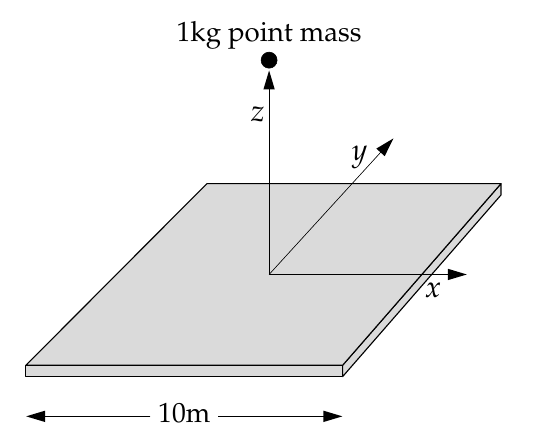

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


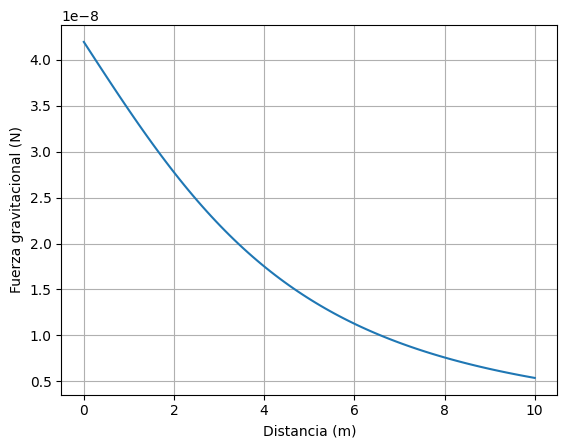

In [28]:
G = 6.674e-11 # Constante gravitacional
M = 10000 # kg
L = 10 # m
sigma = M/(L**2)

f = lambda x, y, z: 1/((x**2 + y**2 + z**2)**(3/2)) # Funcion a integrar

# Ejes X y Y de la grafica
z_values = np.linspace(0.0001, 10, 100)
F_values = np.zeros_like(z_values)

for i in range(len(F_values)):
  z = z_values[i] # valor de z en la iteracion

  a , b = -L/2, L/2 # Limites de integracion

  F = G*sigma*z * dblquad(f, a, b, a, b, args= (z,))[0] # Fuerza
  F_values[i] = F

plt.plot(z_values, F_values, label= 'Fuerza vs distancia en y')

plt.xlabel('Distancia (m)')
plt.ylabel('Fuerza gravitacional (N)')

plt.grid(True)